# Research Question 1

**Question:** Which modes of transport warrant the least time on the road for each unique "Origin" location? From the result of this inquiry, is there a mode of transport that proves consistent throughout each unique origin location? Or are they varied?

**Approach:** Engineer a "Speed" feature from "Time" and "Distance" to conduct this comparison in an absolute manner


In [2]:
# Import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load the main dataset "Festival's Journey" into a DataFrame
journeys_df = pd.read_csv("../cleaned_datasets/Festivals_journeys_dataset.csv")
journeys_df.head()

,Origin,Mode of Transport,Distance,Travel Time,Age Group,Weather,Peak/NoPeak,Day
0,Liverpool,Petrol Car,52.8,1.5,18-24,Rain,No Peak,Weekend
1,Manchester,Bus,88.1,1.8,18-24,Sunny,Peak,Weekend
2,Liverpool,Petrol Car,82.5,1.5,35-44,Cloudy,Peak,Weekend
3,Newcastle,Petrol Car,64.2,1.7,55-64,Rain,Peak,Weekday
4,Newcastle,Petrol Car,115.8,0.7,18-24,Rain,Peak,Weekday


In [4]:
# Create "Speed" column using "Time" and "Distance"
time = journeys_df["Travel Time"]
distance = journeys_df["Distance"]
journeys_df["Speed"] = round((distance/time), 2)

In [5]:
# Verify creation of "Speed" feature
journeys_df.head()

,Origin,Mode of Transport,Distance,Travel Time,Age Group,Weather,Peak/NoPeak,Day,Speed
0,Liverpool,Petrol Car,52.8,1.5,18-24,Rain,No Peak,Weekend,35.20
1,Manchester,Bus,88.1,1.8,18-24,Sunny,Peak,Weekend,48.94
2,Liverpool,Petrol Car,82.5,1.5,35-44,Cloudy,Peak,Weekend,55.00
3,Newcastle,Petrol Car,64.2,1.7,55-64,Rain,Peak,Weekday,37.76
4,Newcastle,Petrol Car,115.8,0.7,18-24,Rain,Peak,Weekday,165.43


# NEEDS EDITING
MarkDown explaining why you subsectioned into peak and NoPeak subsets.The answer is because you want to make an accurate comparisonsicnce ita can be easy to get skewed results when amkeing compoarisons along inconsistent lines. the tieon the roadcoud be longer during peak hours than during NoPeak hours. hence its important toseparate the two foraccuracy

In [7]:
journeys_df["Peak/NoPeak"].value_counts()

Peak/NoPeak
Peak       889
No Peak    586
Name: count, dtype: int64

In [8]:
# Create "Peak" and "No Peak" subsets from the "journeys_df" dataframe
peak_subset = journeys_df[journeys_df["Peak/NoPeak"] == "Peak"]
no_peak_subset = journeys_df[journeys_df["Peak/NoPeak"] == "No Peak"]
peak_subset.head()

,Origin,Mode of Transport,Distance,Travel Time,Age Group,Weather,Peak/NoPeak,Day,Speed
1,Manchester,Bus,88.1,1.8,18-24,Sunny,Peak,Weekend,48.94
2,Liverpool,Petrol Car,82.5,1.5,35-44,Cloudy,Peak,Weekend,55.00
3,Newcastle,Petrol Car,64.2,1.7,55-64,Rain,Peak,Weekday,37.76
4,Newcastle,Petrol Car,115.8,0.7,18-24,Rain,Peak,Weekday,165.43
6,Birmingham,Bus,148.1,1.5,35-44,Rain,Peak,Weekend,98.73


In [9]:
no_peak_subset.head()

,Origin,Mode of Transport,Distance,Travel Time,Age Group,Weather,Peak/NoPeak,Day,Speed
0,Liverpool,Petrol Car,52.8,1.5,18-24,Rain,No Peak,Weekend,35.20
5,Liverpool,Electric Car,88.4,1.8,35-44,Rain,No Peak,Weekend,49.11
7,Bristol,Bus,117.0,1.1,55-64,Cloudy,No Peak,Weekday,106.36
8,Manchester,Bus,86.3,1.1,55-64,Rain,No Peak,Weekend,78.45
12,Bristol,Petrol Car,75.9,1.5,18-24,Cloudy,No Peak,Weekend,50.60


In [10]:
# Distinct Modes of Transport in the dataset
MoTs = list(journeys_df["Mode of Transport"].unique())
MoTs

['Petrol Car', 'Bus', 'Electric Car', 'Train', 'Walk']

In [11]:
# Instantiate a function to process a comparison of Travel Time based on the MoT used and the location of Origin
def Travel_time_comparison(df):
    # Inspect which Mode of Transport is the fastest regardless of the place of origin
    unique_MoT_subsets = {}
    # Loop over the list of "MoTs"
    for MoT in MoTs:
        # Create subsets of journeys_df containing only a single, unique MoT
        MoT_mask = df[df["Mode of Transport"] == MoT]
        # Get the average speed of the unique MoT from each unique origin. 
        speed_by_MoT_and_origin = MoT_mask.groupby("Origin")["Travel Time"].mean()
        # Append "speed_by_MoT_and_origin" group to "unique_MoT_subsets" dictionary
        unique_MoT_subsets[f"{MoT} Travel Time"] = speed_by_MoT_and_origin    
        
    return unique_MoT_subsets

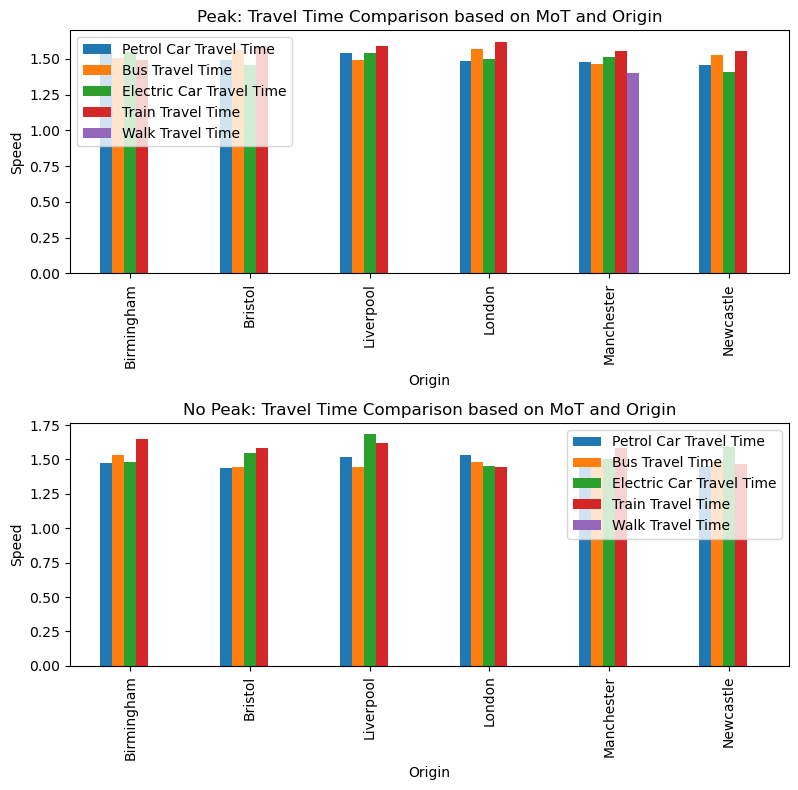

In [12]:
#
peak_df = pd.DataFrame(Travel_time_comparison(peak_subset))
no_peak_df = pd.DataFrame(Travel_time_comparison(no_peak_subset))


# Instantiate a function to visually represent the comparison of the speed of... 
# ...different MoTs by origin during "Peak" and "No Peak" hours
def Travel_time_comparison_barcharts(df1, df2): # df1 place holds for peak_df; df2 place holds for no_peak_df
    fig, axs = plt.subplots(2, 1, figsize=(8, 8))
    df1.plot(kind="bar", 
             xlabel="Origin",
             ylabel= "Speed",
             title="Peak: Travel Time Comparison based on MoT and Origin",
             ax=axs[0]);
    df2.plot(kind="bar", 
             xlabel="Origin",
             ylabel= "Speed",
             title="No Peak: Travel Time Comparison based on MoT and Origin",
             ax=axs[1]);
    plt.tight_layout() 
    plt.show()
    
Travel_time_comparison_barcharts(peak_df, no_peak_df)  

# Provide a summary of MOT that warrants the least amount time on the road when traveling from different origins during either peak or nopeak hours.

PEAK HOURS
1. Birmingham: description
2. Bristol: description
3. Liverpool: description
4. London: description
5. Manchester: description
6. Newcastle: description


NO PEAK HOURS
1. Birmingham: description
2. Bristol: description
3. Liverpool: description
4. London: description
5. Manchester: description
6. Newcastle: description

Now that we know which modes of transport warrant the least time on the road when traveling from certain origins, we can now check the preference for the use of different modes of transport by people from different origins. People from which origin location should be sensitized most regarding their travel choices on the basis of time spent on the road. 

In [15]:
# Distinct origin locations are in the dataset
origins_list = list(journeys_df["Origin"].unique()) 
origins_list

['Liverpool', 'Manchester', 'Newcastle', 'Birmingham', 'Bristol', 'London']

In [77]:
# Loop over the list of origin labels
mot_prefrence_groups = []
for origin in origins_list:
    # Subset "journeys_df" into a set containing only one "origin" location
    origin_mask = journeys_df[journeys_df["Origin"] == origin]
    # Group the different MoTs based on the origin
    origin_groups = origin_mask.groupby("Origin")["Mode of Transport"].value_counts()
    # Visually represent the MoT preference by people from different origin locations
    mot_prefrence_groups.append(origin_groups)

In [89]:
mot_prefrence_groups[0:2]

[Origin     Mode of Transport
 Liverpool  Petrol Car           133
            Bus                   59
            Electric Car          21
            Train                 17
 Name: count, dtype: int64,
 Origin      Mode of Transport
 Manchester  Petrol Car           139
             Bus                   57
             Train                 32
             Electric Car          24
             Walk                   1
 Name: count, dtype: int64]

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(4, 4))
row = 0
col = 0
axis = axs[row, col]
det1 = col
det2 = row
# Represent the findings visually on bar charts
for mot_prefrence in mot_prefrence_groups:
    if det1 < 3:
        col += 1
        mot_prefrence.plot(kind="bar", ax=axis)
    elif det2 < 2 and det1 > 0:        
        row += 1
        col -= 1
        mot_prefrence.plot(kind="bar", ax=axis)